Import the necessary packages.

In [96]:
import pandas as pd
import sqlite3
import gzip
import shutil
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# to get columns not in scientific notation.
pd.options.display.float_format = '{:.4f}'.format

Connect to the sqlite3 database.

In [98]:
conn = sqlite3.connect('unzippedData/im.db')

convert each file to csv

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [99]:
# unzip the imdb

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

Now load and check out each of the CSV files.

In [100]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0000,664300000,2010
3,Inception,WB,292600000.0000,535700000,2010
4,Shrek Forever After,P/DW,238700000.0000,513900000,2010


In [101]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv', sep = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [102]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding='latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [103]:
movies = pd.read_csv('unzippedData/tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.5330,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.7340,2010-03-26,How to Train Your Dragon,7.7000,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.5150,2010-05-07,Iron Man 2,6.8000,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.0050,1995-11-22,Toy Story,7.9000,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.9200,2010-07-16,Inception,8.3000,22186


In [104]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's look at the SQL database, specifically at the movie_basics and movie_ratings tables.

In [105]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)

In [106]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)

In [107]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0000,"Comedy,Drama,Fantasy"


In [108]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [109]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Change the production budget, domestic gross, and worldwide gross fields to floats. 

In [110]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [111]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0000,760507625.0000,2776345279.0000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0000,241063875.0000,1045663875.0000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0000,42762350.0000,149762350.0000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0000,459005868.0000,1403013963.0000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0000,620181382.0000,1316721747.0000


Create a profit column (worldwide gross - production budget). 

In [112]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [113]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0000,760507625.0000,2776345279.0000,2351345279.0000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0000,241063875.0000,1045663875.0000,635063875.0000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0000,42762350.0000,149762350.0000,-200237650.0000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0000,459005868.0000,1403013963.0000,1072413963.0000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0000,620181382.0000,1316721747.0000,999721747.0000


Look at movie budget dataframe per movie.

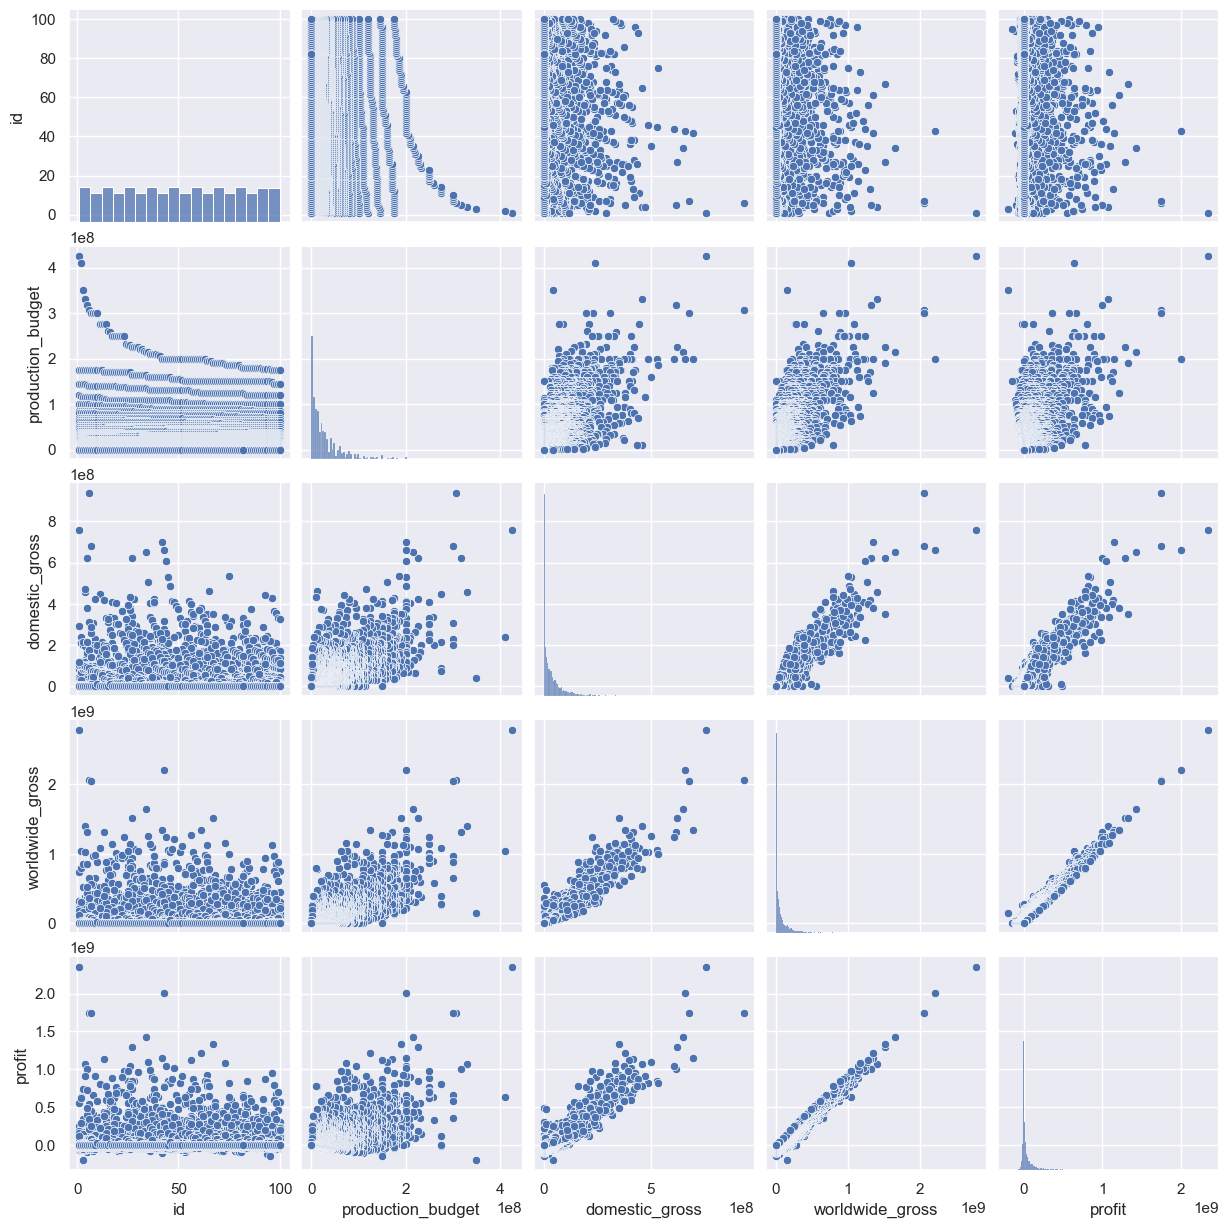

In [114]:
sns.pairplot(movie_budgets)

Looks like a slight positive correlation bewteen worldwide gross and production budget, and between production budget and profit. There's a definite positive correlation between worldwide gross and profit. Zoomed in graphs below.

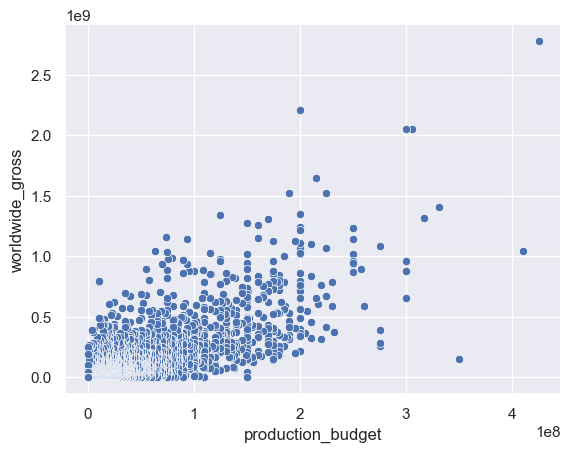

In [115]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='worldwide_gross');

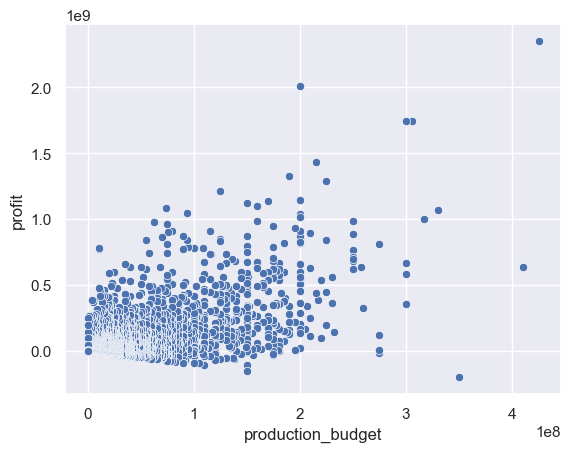

In [116]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='profit');

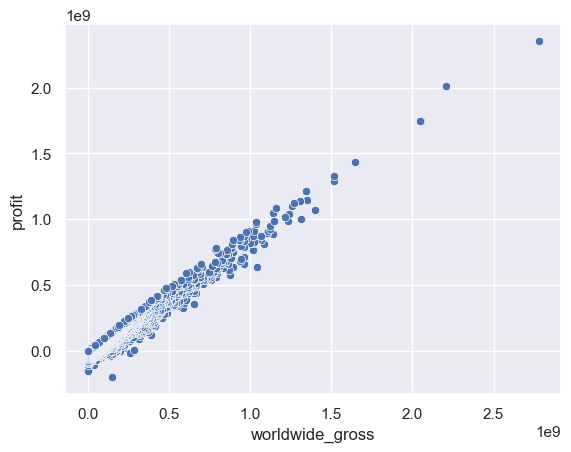

In [117]:
sns.scatterplot(data=movie_budgets, x='worldwide_gross', y='profit');

### Analysis using the Kaggle dataset

After analyzing the given data, we decided to look for a more robust dataset. From here on out, we are using the IMDB dataset from Kaggle, linked here: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset

In [118]:
imdb_movies = pd.read_csv('imdb_movies.csv')
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,271616668.0000,AU
1,Avatar: The Way of Water,12/15/2022,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,2316794914.0000,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0000,724459031.0000,AU
3,Mummies,01/05/2023,70.0000,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0000,34200000.0000,AU
4,Supercell,03/17/2023,61.0000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0000,340941958.6000,US


In [119]:
imdb_movies['status'].value_counts()

 Released           10131
 Post Production       31
 In Production         16
Name: status, dtype: int64

Convert date into datetime format.

In [120]:
imdb_movies['date_x'] = pd.to_datetime(imdb_movies['date_x'])

In [121]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


Drop all movies that are in post production or in production status. We only want to look at released movies. 

In [122]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['status'] != " Released"].index, inplace=True)

In [123]:
imdb_movies['status'].value_counts()

 Released    10131
Name: status, dtype: int64

In [124]:
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,271616668.0000,AU
1,Avatar: The Way of Water,2022-12-15,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,2316794914.0000,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0000,724459031.0000,AU
3,Mummies,2023-01-05,70.0000,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0000,34200000.0000,AU
4,Supercell,2023-03-17,61.0000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0000,340941958.6000,US


In [125]:
# mega_df = pd.read_sql("""
# SELECT *
# FROM
#     movie_basics
#     INNER JOIN movie_ratings
#     USING(movie_id)    
 
#     INNER JOIN directors
#     USING(movie_id)
    
#     INNER JOIN persons
#     USING(person_id)
# ;
# """, conn)

# super_df = pd.concat([mega_df, movie_budgets])

In [126]:
# mega_df = pd.read_sql("""
# SELECT *
# FROM
#    movie_basics
#    INNER JOIN movie_ratings
#    USING(movie_id)    
 
#     INNER JOIN directors
#     USING(movie_id)
    
#     INNER JOIN persons
#     USING(person_id)
# ;
# """, conn).merge(movie_budgets, 
# #                 left_on = 'primary_title',
#                  right_on = 'movie',
#                  how = 'inner').sort_values(by='profit', ascending=False)

In [127]:
# mega_df[mega_df['primary_title'] == 'Avatar'][['primary_title', 'start_year']]

In [128]:
# 1737 rows where profit > 100,000
# mega_df.loc[mega_df['profit'] > 100000].shape

In [129]:
# 1138 rows where profit < 100,000
# mega_df.loc[mega_df['profit'] < 100000].shape

In [130]:
# mega_df['genres'].value_counts()

Let's split up the genres. 

In [131]:
imdb_movies['genre'].value_counts()

Drama                                                    556
Comedy                                                   372
Drama, Romance                                           268
Horror                                                   259
Horror, Thriller                                         199
                                                        ... 
Animation, Comedy, Family, Western                         1
Drama, Crime, Comedy                                       1
Family, Animation, Fantasy, Adventure, Comedy, Music       1
Action, Adventure, Animation, Science Fiction, Family      1
Action, Adventure, Science Fiction, Thriller, Horror       1
Name: genre, Length: 2297, dtype: int64

In [132]:
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Western', 'TV Movie']

for genre in genre_list:
    imdb_movies[genre] = imdb_movies['genre'].str.contains(genre)

In [133]:
len(genre_list)

19

Drop rows where crew is N/A

In [134]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['crew'].isna()].index, inplace=True)

In [135]:
imdb_movies['crew'].isna().sum()

0

Here's all of Adam Sandler's movies, just in case you were wondering.

In [136]:
# useful if we want to look at a specific crew member
adam_sandler_df = imdb_movies.loc[imdb_movies['crew'].str.contains('Adam Sandler')].head()
adam_sandler_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie
12,Murder Mystery 2,2023-03-31,65.0000,"Comedy, Mystery, Action","After starting their own detective agency, Nic...","Adam Sandler, Nick, Jennifer Aniston, Audrey, ...",Murder Mystery 2,Released,English,43800000.0000,...,False,False,False,False,False,True,False,False,False,False
166,Murder Mystery,2019-05-25,63.0000,"Comedy, Mystery","On a long-awaited trip to Europe, a New York C...","Adam Sandler, Nick Spitz, Jennifer Aniston, Au...",Murder Mystery,Released,English,24000000.0000,...,False,False,False,False,False,True,False,False,False,False
508,Grown Ups 2,2013-09-26,61.0000,Comedy,Lenny has relocated his family back to the sma...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups 2,Released,English,80000000.0000,...,False,False,False,False,False,False,False,False,False,False
536,Grown Ups,2010-06-24,64.0000,Comedy,After their high school basketball coach passe...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups,Released,English,75000000.0000,...,False,False,False,False,False,False,False,False,False,False
742,Blended,2014-06-11,69.0000,"Comedy, Romance",Recently divorced mom Lauren and widowed dad J...,"Adam Sandler, Jim, Drew Barrymore, Lauren, Wen...",Blended,Released,English,45000000.0000,...,True,False,False,False,False,False,False,False,False,False


Drop rows where genre is N/A.

In [137]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['genre'].isna()].index, inplace=True)

In [138]:
imdb_movies['genre'].isna().sum()

0

Let's look at some scatterplots to see if there are any obvious correlations. 

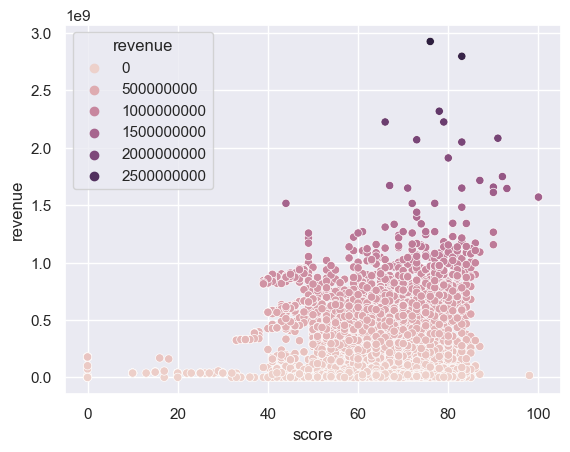

In [139]:
sns.scatterplot(data=imdb_movies, x='score', y='revenue', hue='revenue');

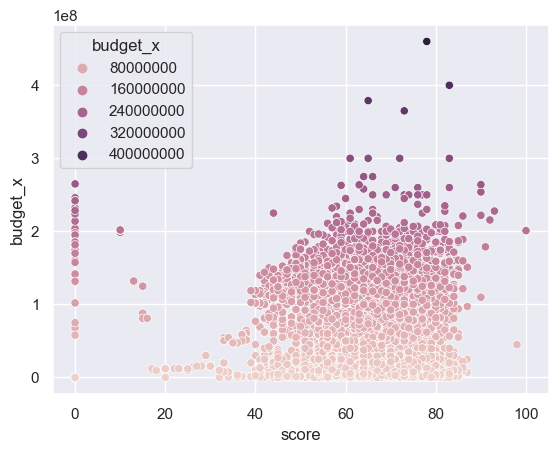

In [140]:
sns.scatterplot(data=imdb_movies, x='score', y='budget_x', hue='budget_x');

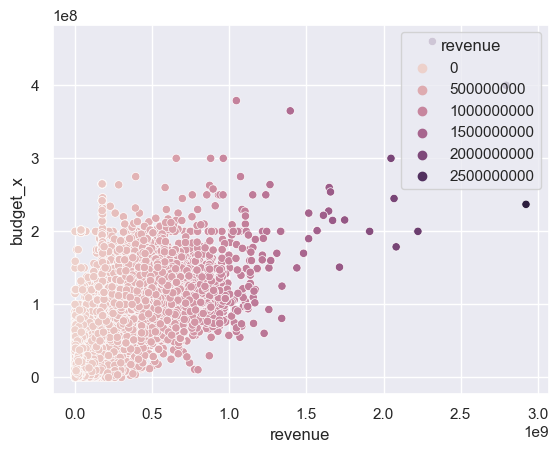

In [141]:
sns.scatterplot(data=imdb_movies, x='revenue', y='budget_x', hue='revenue');

In [142]:
# sns.pairplot(mega_df)

In [143]:
# check for avatar to see if merged df is correct

In [144]:
# movie_basics[movie_basics['primary_title'] == 'Avatar']

In [145]:
# movie_ratings[movie_ratings['movie_id'] == 'tt1775309']

In [146]:
# mega_df.loc[mega_df['original_title'] == 'Abatâ']

In [147]:
# mega_df[mega_df['primary_title'] == 'Titanic'][['production_budget', 'primary_name']]

In [148]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].max()

In [149]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].min()

In [150]:
# mega_df[mega_df['Comedy'] == True]['averagerating'].mean()

In [151]:
# genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
#               'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
#               'Mystery', 'Drama', 'War', 'Biography', 'Musical']

# genre_means = {}

# for genre in genre_list:
#     mean = mega_df[mega_df[genre] == True]['averagerating'].mean()
#     genre_means[genre] = mean
# genre_means       

In [152]:
imdb_movies.loc[imdb_movies['names'] == 'Avatar']

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie
68,Avatar,2009-12-17,76.0000,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0000,...,False,True,False,False,False,False,False,False,False,False


Some visualizations: 

Let's look at score per genre:

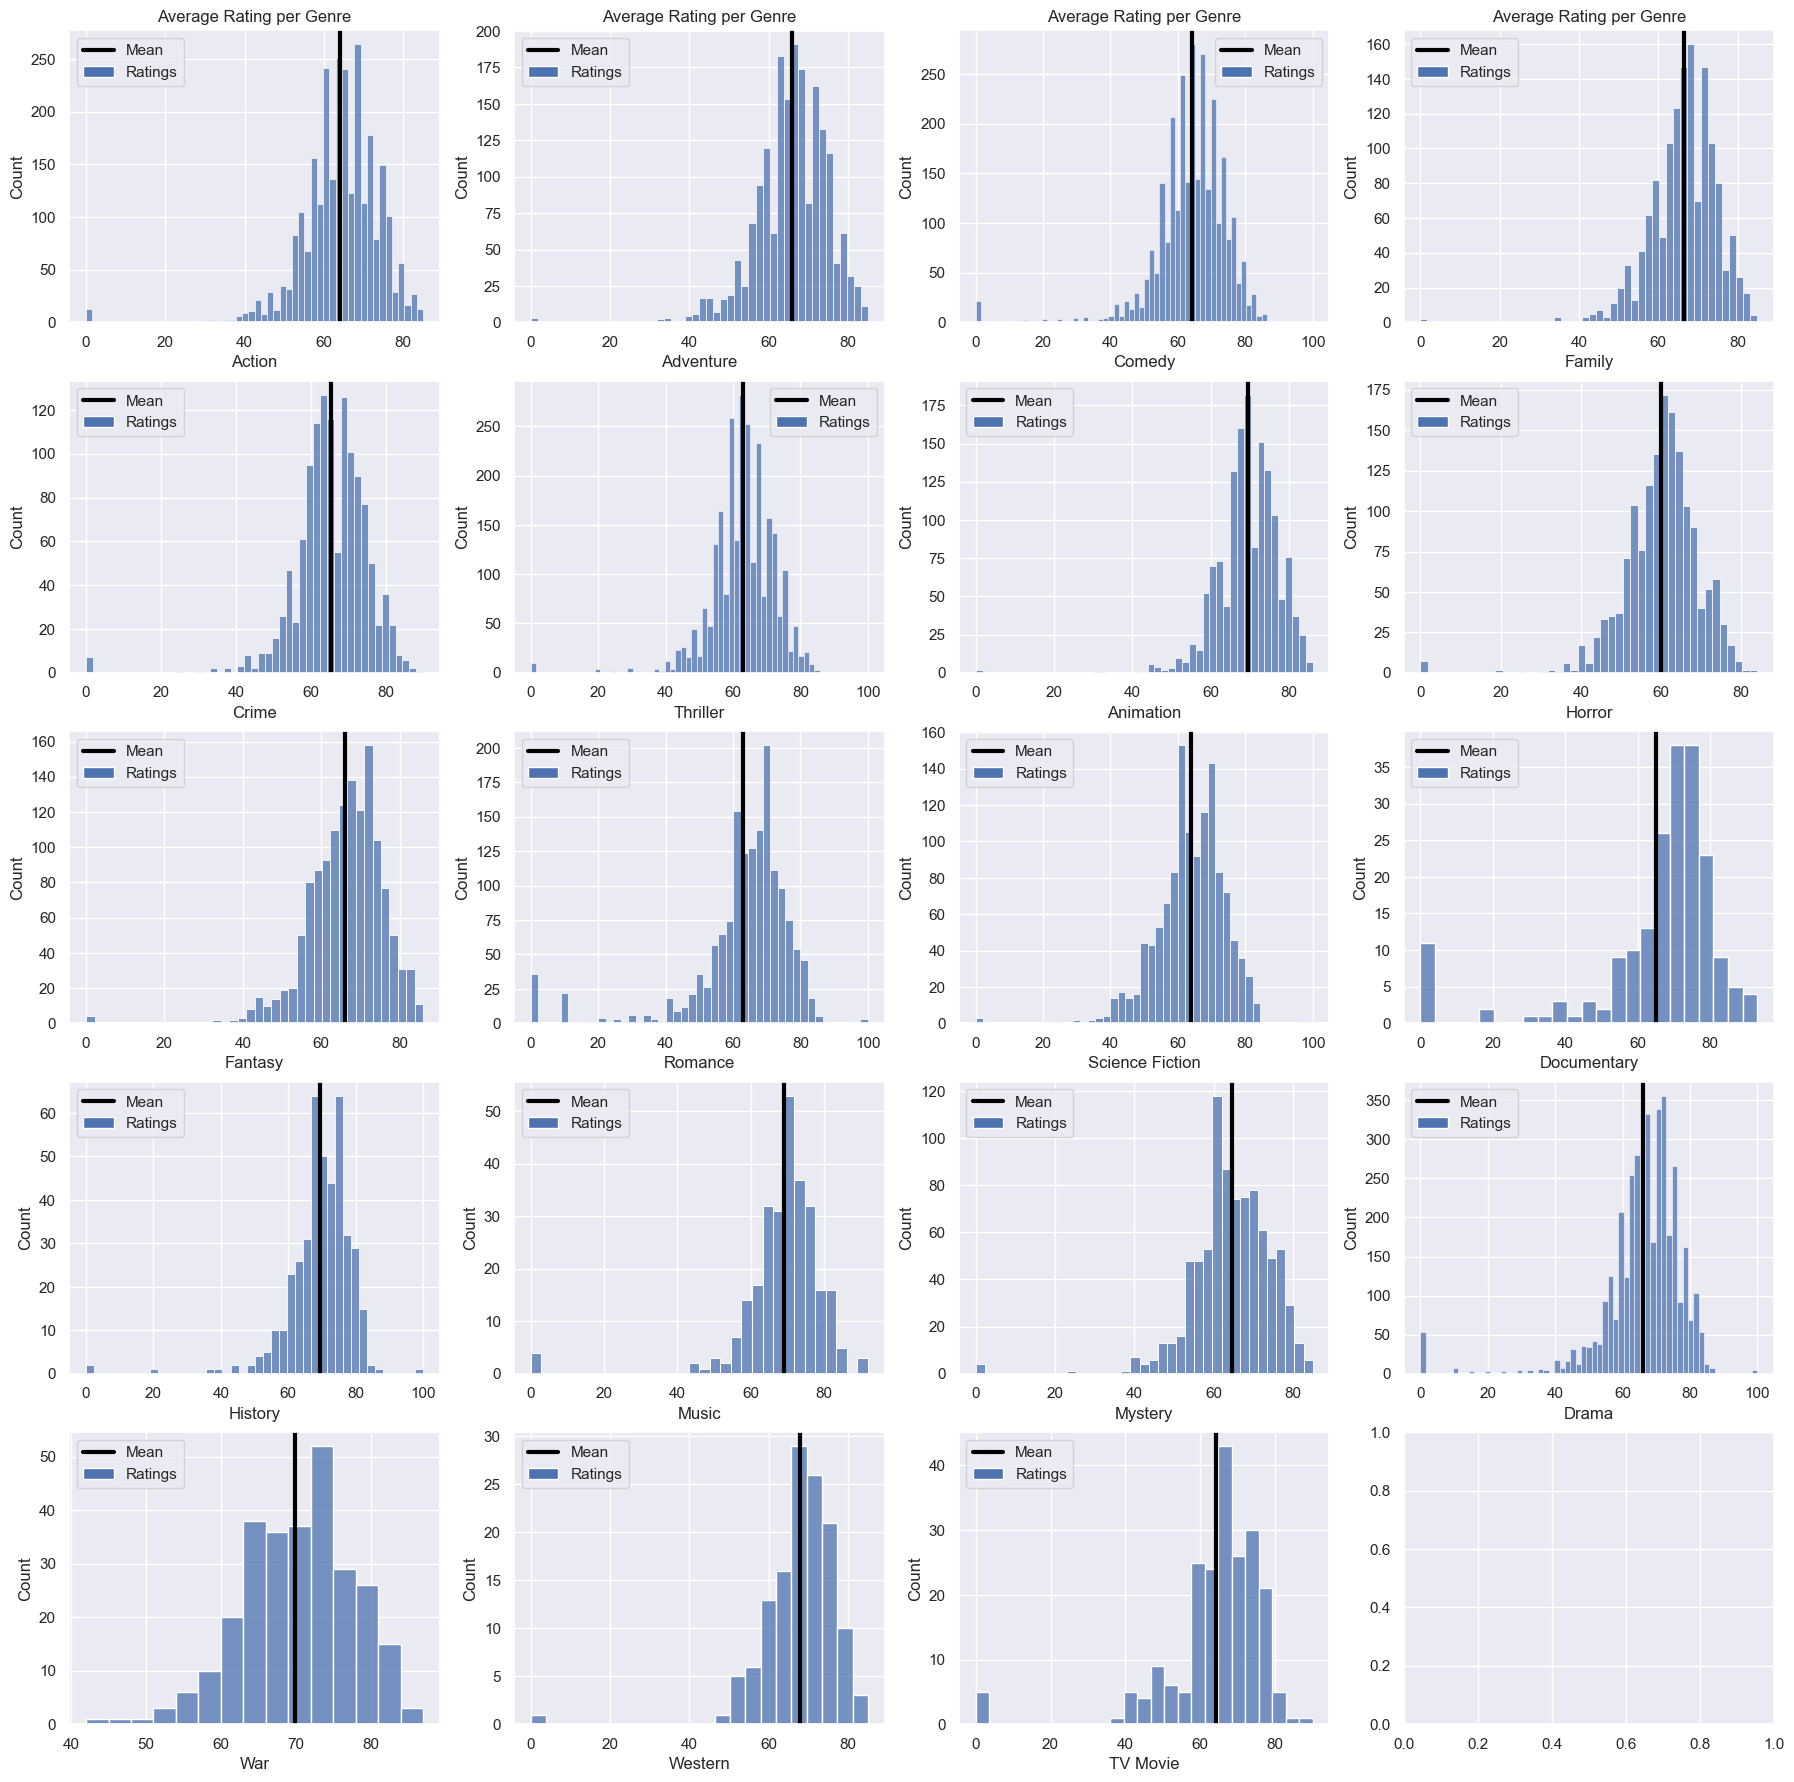

In [153]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['score'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['score'].mean(), color = 'black', lw = 3)
    
    labels = ['Mean', 'Ratings']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Rating per Genre')        
    y += 1
    x += .25

And profit per genre:

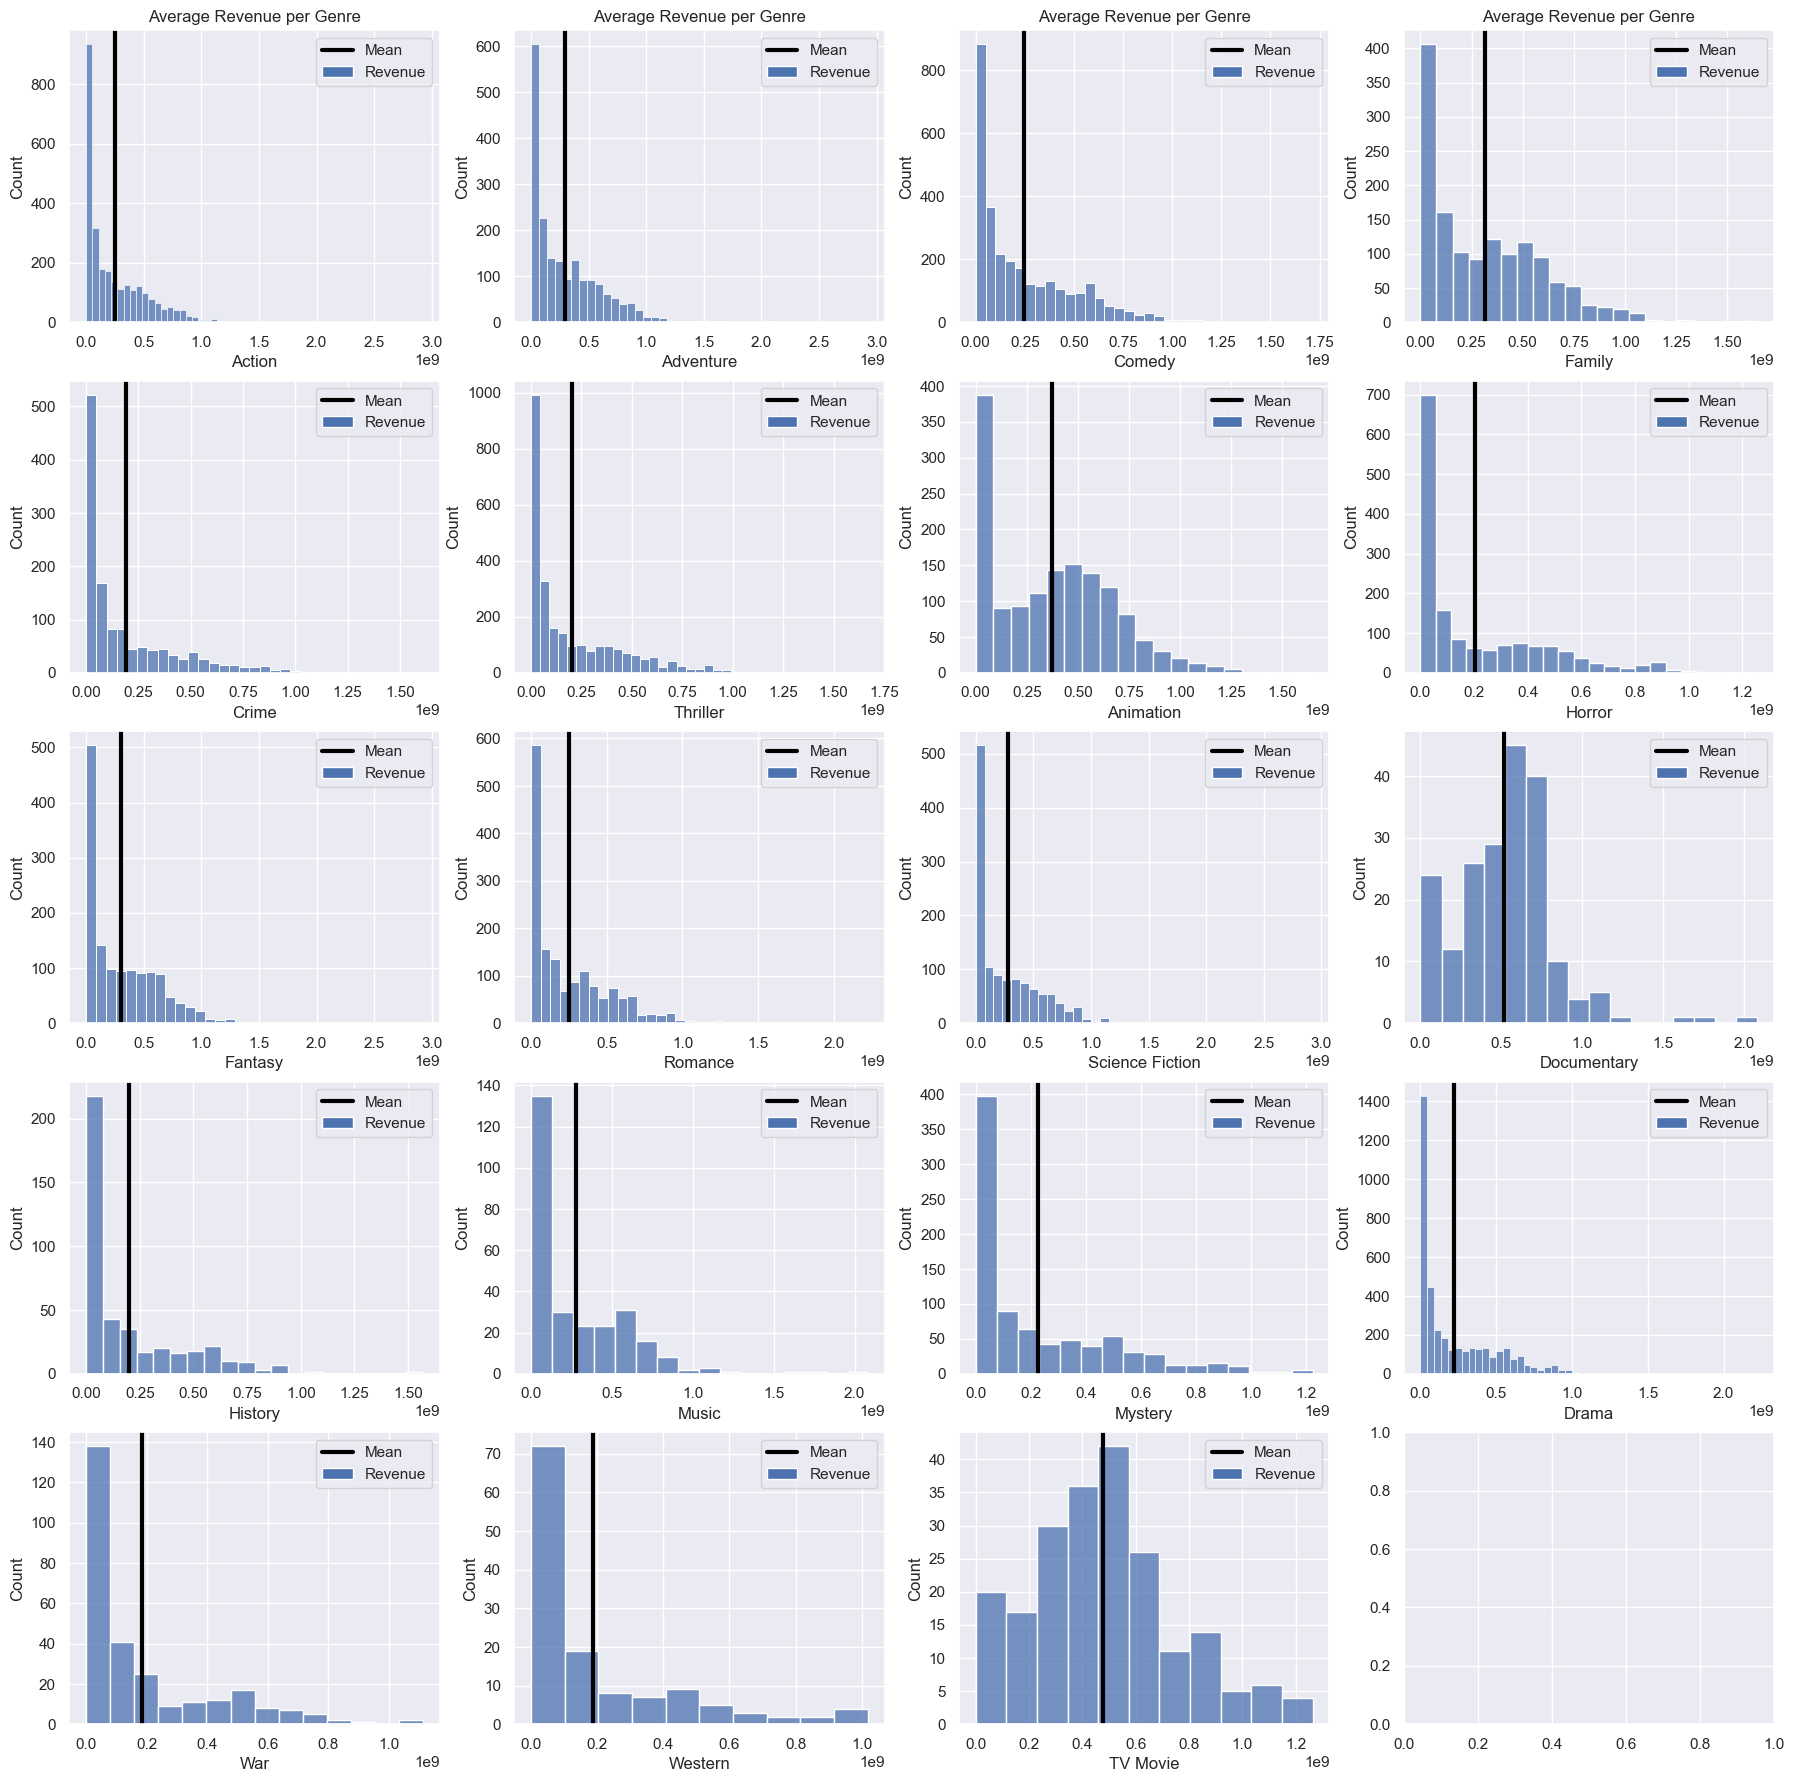

In [154]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['revenue'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['revenue'].mean(), color = 'black', lw = 3)
    
    labels = ['Mean', 'Revenue']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Revenue per Genre')        
    y += 1
    x += .25

In [155]:
# sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
#               font_scale=1, color_codes=True, rc=None)

# fig, axs = plt.subplots(5, 4, figsize=(22, 22))
# y = 0
# x = 0

# for genre in genre_list:
#     sns.histplot(mega_df[mega_df[genre] == True]['profit'], ax = axs[math.floor(x),y%4])
#     axs[math.floor(x),y%4].set_xlabel(genre)
#     axs[math.floor(x),y%4].set_ylabel('profit')
#     axs[math.floor(x),y%4].axvline(x = mega_df[mega_df[genre] == True]['profit'].mean(), color = 'black', lw = 3)
    
#     labels = ['Mean', 'Profit']
#     axs[math.floor(x),y%4].legend(labels)
    
#     if math.floor(x) == 0:
#         axs[math.floor(x),y%4].set_title('Average Profit per Genre')        
#     y += 1
#     x += .25

In [156]:
# what is the percentage profit?
# mega_df['percentage_profit'] = mega_df['profit'] / mega_df['production_budget']

In [157]:
# mega_df.loc[mega_df['percentage_profit'] == mega_df['percentage_profit'].max()]

In [158]:
# mega_df.loc[mega_df['percentage_profit'] == mega_df['percentage_profit'].min()]

<Figure size 1400x1000 with 0 Axes>

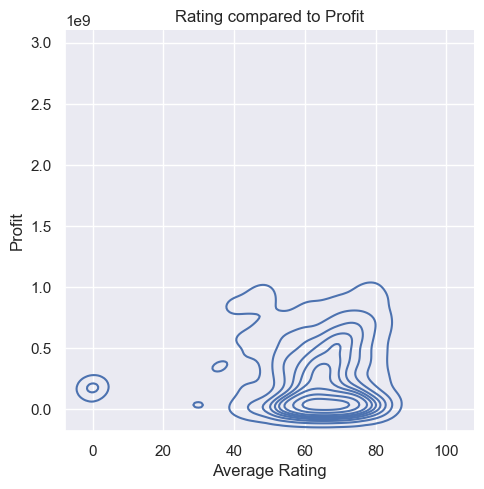

In [159]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

plt.figure(figsize = (14, 10))
sns.displot(data=imdb_movies, x='score', y='revenue', kind='kde')
plt.xlabel('Average Rating')
plt.ylabel('Profit')
plt.title('Rating compared to Profit')
plt.grid(True)
plt.show();

In [160]:
# mega_df.loc[mega_df['profit'] == mega_df['profit'].max()]

In [161]:
# mega_df.loc[mega_df['profit'] == mega_df['profit'].min()]

In [162]:
# mega_df.loc[mega_df['percentage_profit'] > 100][['original_title', 'production_budget', 'worldwide_gross']]

In [163]:
# mega_df.loc[mega_df['percentage_profit'] < 50][['original_title', 'production_budget', 'worldwide_gross']]

In [164]:
# mega_df[mega_df['original_title'] == 'Titanic'][['original_title', 'production_budget', 'worldwide_gross', 'profit', 'percentage_profit']]

In [165]:
# mega_df.loc[mega_df['profit'] > 100000][['original_title', 'production_budget', 'worldwide_gross', 'percentage_profit']]

In [166]:
# production budget vs profit
imdb_movies['budget_x'].agg(['min','max'])

min           1.0000
max   460000000.0000
Name: budget_x, dtype: float64

In [167]:
imdb_movies.loc[imdb_movies['budget_x'] == 460000000]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie
1,Avatar: The Way of Water,2022-12-15,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,False,True,False,False,False,False,False,False,False,False


In [168]:
imdb_movies.loc[imdb_movies['names'].str.contains('Avatar')][['names', 'budget_x', 'revenue']]

,names,budget_x,revenue
1,Avatar: The Way of Water,460000000.0000,2316794914.0000
68,Avatar,237000000.0000,2923706026.0000
572,Avatar: Creating the World of Pandora,100140523.8000,625891229.0000
699,Capturing Avatar,101700000.0000,716719914.2000
777,Avatar: The Deep Dive - A Special Edition of 2...,98800000.0000,580810039.6000
2904,The King's Avatar: For the Glory,167940000.0000,320146113.6000
9416,Avatar Spirits,172000000.0000,580068063.6000


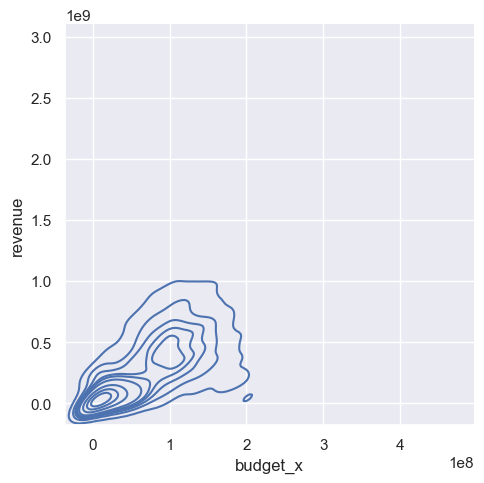

In [169]:
sns.displot(data=imdb_movies, x='budget_x', y='revenue', kind='kde');

Let's look at different combinations of genre and the revenue they produce.

In [170]:
imdb_movies.groupby('genre')['revenue'].mean().sort_values(ascending = False)

genre
Adventure, Action, Science Fiction, Fantasy                                              2068223624.0000
Family, Animation, Adventure, Comedy, Fantasy                                            1437862795.0000
Family, Animation, Drama                                                                 1316963710.5000
Animation, Action, Comedy, Mystery, Crime, Fantasy                                       1213425726.6000
TV Movie, Animation, Science Fiction, Action, Adventure, Comedy, Drama, Fantasy, Music   1180869057.8000
                                                                                               ...      
Family, Music, TV Movie, Comedy                                                                   0.0000
Science Fiction, Thriller, Mystery, Action, Adventure                                             0.0000
Thriller, Drama, Action, Crime                                                                    0.0000
Animation, Family, Comedy, TV Movie              

In [171]:
# create a dictionary for each individual genre and the average revenue
# not normalized
revenue_means = {}

for genre in genre_list:
    mean = imdb_movies[imdb_movies[genre] == True]['revenue'].mean()
    revenue_means[genre] = mean
revenue_means 

{'Action': 252368842.99420607,
 'Adventure': 295617573.7404483,
 'Comedy': 246300719.38271856,
 'Family': 316284575.15573066,
 'Crime': 190153868.5256917,
 'Thriller': 201929746.4873457,
 'Animation': 374798548.8680498,
 'Horror': 203270554.67055017,
 'Fantasy': 302275287.4007315,
 'Romance': 252491436.63290817,
 'Science Fiction': 276845286.14944005,
 'Documentary': 515619565.96482414,
 'History': 198386907.3661905,
 'Music': 277532154.19345456,
 'Mystery': 225472228.6459743,
 'Drama': 223808804.52398,
 'War': 185220841.82014388,
 'Western': 188240288.52671754,
 'TV Movie': 478087762.32511854}

In [172]:
# convert dictionary to dataframe
revenue_means_df = pd.DataFrame.from_dict(data = revenue_means, orient = 'index')

In [173]:
# rename the columns so that they make sense
revenue_means_df.rename(columns = {0: 'Revenue Avg'}, inplace=True)
revenue_means_df.head()

,Revenue Avg
Action,252368842.9942
Adventure,295617573.7404
Comedy,246300719.3827
Family,316284575.1557
Crime,190153868.5257


In [174]:
# attempted scaled
# ax = sns.barplot(x=revenue_means_scaled['Revenue Avg'], y=revenue_means_scaled.index)
# ax.axvline(x = revenue_means_scaled['Revenue Avg'].mean(), color = 'black', lw = 2)
# labels = ['Mean rev all genres']
# ax.legend(labels);

In [175]:
# unscaled
# ax = sns.barplot(x=revenue_means_df['Revenue Avg'], y=revenue_means_df.index)
# ax.axvline(x = revenue_means_df['Revenue Avg'].mean(), color = 'black', lw = 2)
# labels = ['Mean rev all genres']
# ax.legend(labels);

In [176]:
# imdb_movies.loc[imdb_movies['TV Movie'] == True].shape

In [177]:
# imdb_movies.loc[imdb_movies['Adventure'] == True].shape

In [178]:
# len(imdb_movies)

what percent of the market is each genre

In [179]:
# imdb_movies.loc[imdb_movies['Action'] == True]['Action'].sum() / len(imdb_movies)

In [180]:
# imdb_movies.loc[imdb_movies['TV Movie'] == True]['TV Movie'].sum()

In [184]:
imdb_movies['Percent Genre in Market'].sum()

10007

In [185]:
# checks for action if everything is correct
imdb_movies[imdb_movies['Action'] == True]['Percent Genre in Market'].head()

0    1
1    1
4    1
6    1
8    1
Name: Percent Genre in Market, dtype: int64

In [186]:
# imdb_movies.loc[imdb_movies['Action'] == True]['Action'].count() / len(imdb_movies)

In [187]:
# checks what percent of the market do JUST action movies make up
imdb_movies['Percent Genre in Market'].loc[imdb_movies['genre'] == 'Action']

4        1
42       1
483      1
530      1
1066     1
        ..
9879     1
9956     1
9990     1
10158    1
10174    1
Name: Percent Genre in Market, Length: 86, dtype: int64

In [188]:
# same as above. Make sense, only like 80 something movies classified as just action
len(imdb_movies.loc[imdb_movies['genre'] == 'Action']) / len(imdb_movies)

0.008593984211052263

In [189]:
# create a list with the genres cleaned
l = list(imdb_movies.groupby('genre').groups.keys())
clean_list = []
 
for i in l:
    clean_list.append(i.replace('\xa0', " "))
 

In [190]:
imdb_movies['Percent Genre in Market'] = 1

In [191]:
# create a new column
# for each genre in our clean list above, look at the percent genre in market where the genre column = genre
# then set that equal to the length of where genre = genre is true divided by total length of dataframe

for genre in clean_list:
    imdb_movies['Percent Genre in Market'].loc[imdb_movies['genre'] == genre] = len(imdb_movies.loc[imdb_movies['genre'] == genre]) / len(imdb_movies)

C:\Users\Nick\AppData\Local\Temp\ipykernel_27464\3474079319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies['Percent Genre in Market'].loc[imdb_movies['genre'] == genre] = len(imdb_movies.loc[imdb_movies['genre'] == genre]) / len(imdb_movies)


In [192]:
# imdb_movies['Percent Genre in Market'].value_counts(ascending=True).index.sort_values(ascending=True).tolist()

In [193]:
# imdb_movies.columns.sort_values(ascending=True)

In [194]:
# creates a new column that is the percent genre in market times the revenue to get percentage revenue
imdb_movies['revenue_percent'] = imdb_movies['Percent Genre in Market'] * imdb_movies['revenue']

In [195]:
# imdb_movies.loc[imdb_movies['genre'] == 'Action,\xa0Adventure']

In [196]:
# imdb_movies.loc[imdb_movies['genre'] == 'Action,\xa0Adventure']

In [197]:
# create dictionary for revenue percent means

rev_percent_by_genre = {}

for genre in l:
    mean = imdb_movies[imdb_movies['genre'] == genre]['revenue_percent'].mean()
    rev_percent_by_genre[genre] = mean

In [198]:
# turn dict into dataframe
rev_percent_by_genre_df = pd.DataFrame.from_dict(data = rev_percent_by_genre, orient = 'index')
rev_percent_by_genre_df.rename(columns = {0: 'Revenue Adjusted by Percent'}, inplace=True)
rev_percent_by_genre_df.head()

,Revenue Adjusted by Percent
Action,1686625.9783
"Action, Adventure",229956312.7778
"Action, Adventure, Animation",548015646.2667
"Action, Adventure, Animation, Comedy",401345912.0000
"Action, Adventure, Animation, Comedy, Family",356813557.5000


In [199]:
# filtered for top 20 rev percents
rev_percent_top_20 = rev_percent_by_genre_df['Revenue Adjusted by Percent'].sort_values(ascending=False).head(20)
rev_percent_top_20_df = pd.DataFrame(data = rev_percent_top_20)

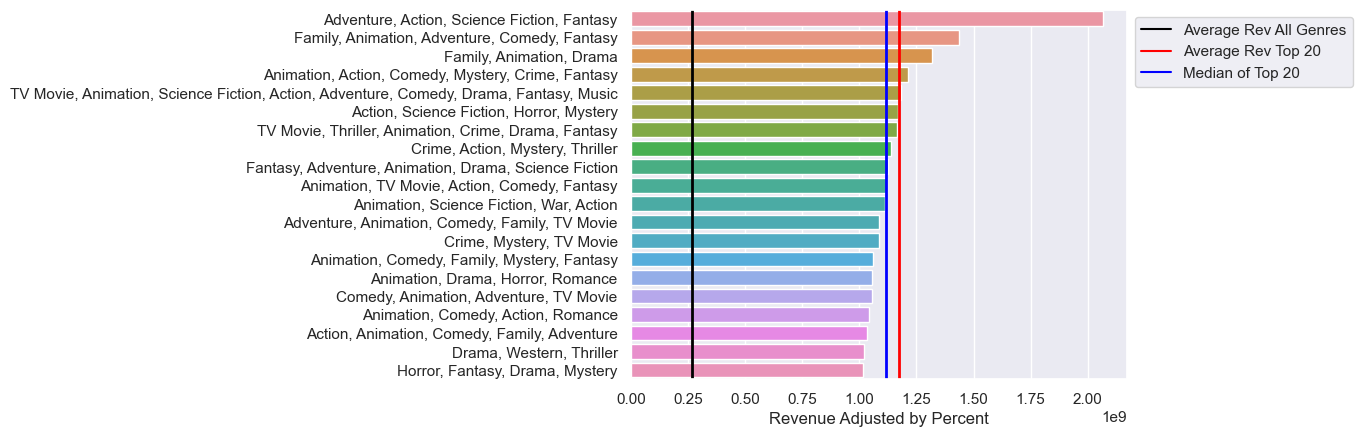

In [201]:
from matplotlib.lines import Line2D

ax = sns.barplot(x=rev_percent_top_20_df['Revenue Adjusted by Percent'], y=rev_percent_top_20_df.index)
ax.axvline(x = rev_percent_by_genre_df['Revenue Adjusted by Percent'].mean(), color = 'black', lw = 2)
ax.axvline(x = rev_percent_top_20_df['Revenue Adjusted by Percent'].mean(), color = 'red', lw = 2)
ax.axvline(x = rev_percent_top_20_df['Revenue Adjusted by Percent'].median(), color = 'blue', lw = 2)
labels = ['Average Rev All Genres', 'Average Rev Top 20','Median of Top 20']

a = Line2D([], [], color='black', label='Average Rev All Genres')
b = Line2D([], [], color='red', label='Average Rev Top 20')
c = Line2D([], [], color='blue', label='Median of Top 20')
plt.legend(handles=[a, b, c], bbox_to_anchor= (1,1));